In [1]:
import os
import pathlib

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from skluc.main.utils import logger


pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', None)

flatten = lambda l: [item for sublist in l for item in sublist]

2018-09-26 13:24:33,301 [27037] DEBUG    matplotlib.backends: backend module://ipykernel.pylab.backend_inline version unknown


In [3]:
FILENAME = "gathered_results.csv"
DIRNAME = "/home/luc/Resultats/Deepstrom/september_2018/few_shot_tests_knn_nobacktrain/"
filepath = os.path.join(DIRNAME, FILENAME)

In [5]:
df_root = pd.read_csv(filepath)
df_root = df_root.dropna(how="all")
df_root['--nys-size'].replace('None', np.nan, inplace=True)
df_root['--out-dim'].replace('None', np.nan, inplace=True)
df_root = df_root.apply(pd.to_numeric, errors="ignore")
df_root.head()

accuracy_test  global_time  --chi-square-PD-kernel  --chi-square-kernel --classification-method   --cut-layer --distance  --dropout  --exp-chi-square-kernel --gamma  --laplacian-kernel  --linear-kernel --nb-class-val  --nb-neighbour --nb-stack  --non-linear                    --non-linearity  --num-class-ep-test  --num-class-ep-train  --num-episode-test  --num-episode-train  --num-epoch  --num-query-ex  --num-supp-ex  --nys-size  --out-dim  --quiet  --rbf-kernel  --real-nystrom  --seed  deepfriedconvnet  deepstrom  dense    kernel    network   none
0       0.907477   135.944792                   False                 True                     knn  activation_4         L1        1.0                    False    None               False            False           None               1       None         False  <function relu at 0x7fc2fd794bf8>                   20                    60                1000                10000          300              15              5       128.0        0.0    False         False           False       0             False       True  False  chi2_cpd  deepstrom  False
1       0.889273    82.487059                   False                 True                     knn  activation_4         L1        1.0                    False    None               False            False           None               3       None         False  <function relu at 0x7f714c4c5bf8>                   20                    60                1000                10000          300              15              5      1024.0        0.0    False         False           False       0             False       True  False  chi2_cpd  deepstrom  False
2       0.800427   130.237299                   False                False                     knn  activation_4         L1        1.0                    False    None               False             True           None               1       None         False  <function relu at 0x7f1dc73d5bf8>                   20                    60                1000                10000          300              15              5        16.0        0.0    False         False           False       0             False       True  False    linear  deepstrom  False
3       0.904547    76.303763                   False                False                     knn  activation_4         L2        1.0                    False    None               False             True           None               1       None         False  <function relu at 0x7f6c4b6d4bf8>                   20                    60                1000                10000          300              15              5      1024.0        0.0    False         False           False       0             False       True  False    linear  deepstrom  False
4       0.819407    97.591920                   False                False                     knn  activation_4         L2        1.0                    False    None               False             True           None               2       None         False  <function relu at 0x7f3d64ad4bf8>                   20                    60                1000                10000          300              15              5       512.0        0.0    False         False           False       0             False       True  False    linear  deepstrom  False

In [7]:
df = df_root.loc[:, ["accuracy_test", "global_time", "--distance", "--nb-neighbour", "--classification-method", "--num-class-ep-test", "--num-class-ep-train", "--num-epoch", "--num-query-ex", "--num-supp-ex", "--nys-size", "--out-dim", "kernel", "network"]]
df.head()

accuracy_test  global_time --distance  --nb-neighbour --classification-method  --num-class-ep-test  --num-class-ep-train  --num-epoch  --num-query-ex  --num-supp-ex  --nys-size  --out-dim    kernel    network
0       0.907477   135.944792         L1               1                     knn                   20                    60          300              15              5       128.0        0.0  chi2_cpd  deepstrom
1       0.889273    82.487059         L1               3                     knn                   20                    60          300              15              5      1024.0        0.0  chi2_cpd  deepstrom
2       0.800427   130.237299         L1               1                     knn                   20                    60          300              15              5        16.0        0.0    linear  deepstrom
3       0.904547    76.303763         L2               1                     knn                   20                    60          300              15              5      1024.0        0.0    linear  deepstrom
4       0.819407    97.591920         L2               2                     knn                   20                    60          300              15              5       512.0        0.0    linear  deepstrom

In [8]:
df.sort_values(by="accuracy_test", ascending=False)

accuracy_test  global_time --distance  --nb-neighbour --classification-method  --num-class-ep-test  --num-class-ep-train  --num-epoch  --num-query-ex  --num-supp-ex  --nys-size  --out-dim    kernel    network
124       0.958393    49.203281         L2               1                     knn                   20                    60          300              15              5         NaN        NaN      None       none
62        0.953807    50.153563         L1               1                     knn                   20                    60          300              15              5         NaN        NaN      None       none
116       0.951217    49.433950         L2               3                     knn                   20                    60          300              15              5         NaN        NaN      None       none
122       0.949790    49.968442         L1               3                     knn                   20                    60          300              15              5         NaN        NaN      None       none
47        0.945630    49.739912         L2               5                     knn                   20                    60          300              15              5         NaN        NaN      None       none
53        0.939707    50.126014         L1               5                     knn                   20                    60          300              15              5         NaN        NaN      None       none
101       0.938083    49.076488         L2               4                     knn                   20                    60          300              15              5         NaN        NaN      None       none
54        0.934137    50.357775         L1               4                     knn                   20                    60          300              15              5         NaN        NaN      None       none
32        0.926013    48.946490         L2               2                     knn                   20                    60          300              15              5         NaN        NaN      None       none
56        0.920997    50.427476         L1               2                     knn                   20                    60          300              15              5         NaN        NaN      None       none
15        0.917850    79.757130         L2               1                     knn                   20                    60          300              15              5      1024.0        0.0  chi2_cpd  deepstrom
78        0.916860    90.036025         L2               1                     knn                   20                    60          300              15              5       512.0        0.0  chi2_cpd  deepstrom
81        0.916127    83.777754         L2               1                     knn                   20                    60          300              15              5       256.0        0.0  chi2_cpd  deepstrom
14        0.915170    73.375219         L2               1                     knn                   20                    60          300              15              5       128.0        0.0  chi2_cpd  deepstrom
85        0.912500   100.271852         L1               1                     knn                   20                    60          300              15              5      1024.0        0.0  chi2_cpd  deepstrom
8         0.908867   125.178977         L1               1                     knn                   20                    60          300              15              5       512.0        0.0  chi2_cpd  deepstrom
31        0.908827   112.503171         L1               1                     knn                   20                    60          300              15              5       256.0        0.0  chi2_cpd  deepstrom
0         0.907477   135.944792         L1               1                     knn                   20                    60          300              1

In [15]:
kernel_names = set(df["kernel"].values)
kernel_names.remove("None")
logger.debug("Kernel functions are: {}".format(kernel_names))

nystrom_sizes = set(df["--nys-size"])
logger.debug(f"Nystrom sizes: {nystrom_sizes}")

output_dims = set(df["--out-dim"])
logger.debug(f"Output dimension: {output_dims}")

networks = set(df["network"].values)
logger.debug(f"Network types are {networks}")

nb_neighbours = set(df["--nb-neighbour"].values)
logger.debug(f"Nb neighbours values are {nb_neighbours}")

distances = set(df["--distance"].values)
logger.debug(f"Possible distances are {distances}")

2018-09-26 13:37:51,453 [27037] DEBUG    root: Kernel functions are: {'chi2_cpd', 'linear'}
2018-09-26 13:37:51,455 [27037] DEBUG    root: Nystrom sizes: {128.0, 1024.0, 64.0, 512.0, 256.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 16.0}
2018-09-26 13:37:51,456 [27037] DEBUG    root: Output dimension: {0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan}
2018-09-26 13:37:51,458 [27037] DEBUG    root: Network types are {'deepstrom', 'none'}
2018-09-26 13:37:51,459 [27037] DEBUG    root: Nb neighbours values are {1, 2, 3, 4, 5}
2018-09-26 13:37:51,460 [27037] DEBUG    root: Possible distances are {'L1', 'L2'}


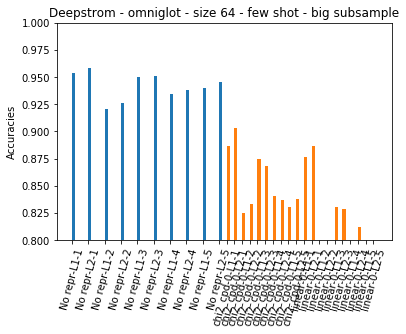

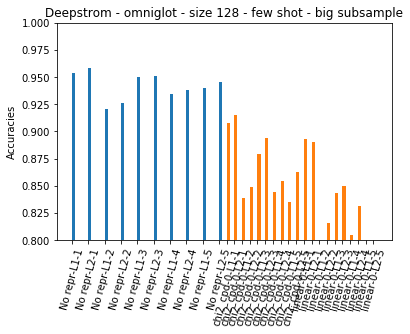

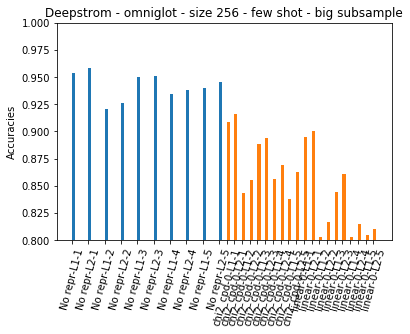

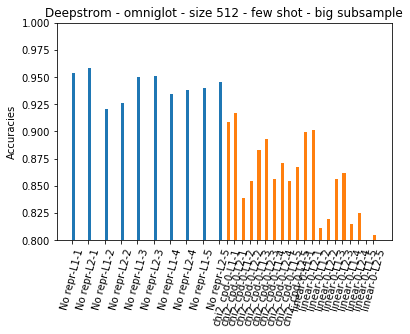

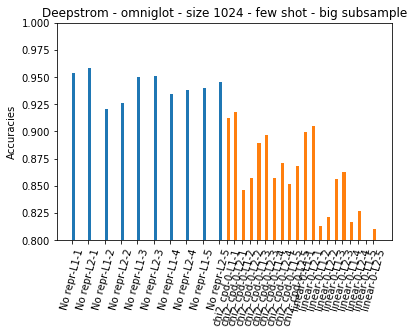

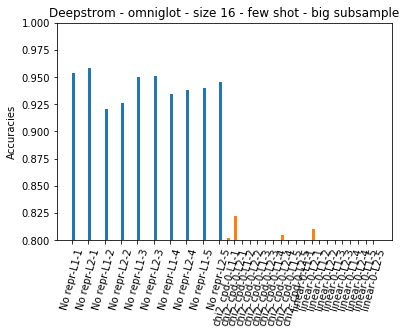

In [30]:
step_between_groups = 0.25
group_size = 10
step_inside_groups = 0.15
bar_width = 0.2
min_acc = 0.8
max_acc = 1.0
linewidth = 0.9

real_nys_marker = "s"

learned_nys_marker = "x"

dense_marker = "v"
dense_color = "r"

deepfried_marker = "8"
deepfried_color = "b"

d_translate_kernel = {
    "linear": "Linear",
    "chi2_cpd": "Chi2",
    "rbf": "Gaussian",
}


for idx_plot, n_size in enumerate(sorted(nystrom_sizes)):
    if np.isnan(n_size):
        continue
    fig, axs = plt.subplots()
    group_of_bins = []
    group_of_bins_labels = []
    
    
    df_none = df[df["network"] == "none"]
    current_group_of_bins = []
    current_group_of_bins_labels = []
    for nb_neigh in nb_neighbours:
        df_neigh = df_none[df_none["--nb-neighbour"] == nb_neigh]
        for dist in distances:
            df_dist = df_neigh[df_neigh["--distance"] == dist]
            current_group_of_bins.append(df_dist["accuracy_test"].values[0])
            current_group_of_bins_labels.append(f"No repr-{dist}-{nb_neigh}")
    group_of_bins.append(current_group_of_bins)
    group_of_bins_labels.append(current_group_of_bins_labels)
    df_deepstrom = df[df["network"] == "deepstrom"]
        
    df_n_size = df_deepstrom[df_deepstrom["--nys-size"] == n_size]

    for o_dim in sorted(output_dims):
        if np.isnan(o_dim):
            continue
        df_o_dim = df_n_size[df_n_size["--out-dim"] == o_dim]
        if len(df_o_dim) > 0:
            current_group_of_bins = []
            current_group_of_bins_labels = []
            for k_name in sorted(kernel_names):
                df_k_name = df_o_dim[df_o_dim["kernel"] == k_name]
                for nb_neigh in nb_neighbours:
                    df_neigh = df_k_name[df_k_name["--nb-neighbour"] == nb_neigh]
                    for dist in distances:
                        df_dist = df_neigh[df_neigh["--distance"] == dist]
                        current_group_of_bins.append(df_dist["accuracy_test"].values[0])
                        current_group_of_bins_labels.append(f"{k_name}-{int(o_dim)}-{dist}-{nb_neigh}")

            group_of_bins.append(current_group_of_bins)
            group_of_bins_labels.append(current_group_of_bins_labels)
    
    x_locations_total = []
    x_labels_total = []
    for i, group in enumerate(group_of_bins):
        x_locations = np.linspace(start=i*(group_size) + step_between_groups, stop=(i+1)*(group_size) - step_between_groups, num=len(group))
        x_locations_total.extend(list(x_locations))
        x_labels_total.extend(list(group_of_bins_labels[i]))
        axs.bar(x_locations, 
                group,
                width=bar_width,
                align="edge")
    axs.set_ylim(min_acc, max_acc)        
    axs.set_ylabel('Accuracies')
    axs.set_title(f'Deepstrom - omniglot - size {int(n_size)} - few shot - big subsample')
#     base_out_dir = os.path.join(os.path.abspath(__file__.split(".")[0]), "images")
#     out_name = "acc_param_{}_{}_{}".format(k_name, wafter, multiview_method)

#     pathlib.Path(out_dir_cut_layer).mkdir(parents=True, exist_ok=True)
#     out_path = os.path.join(out_dir_cut_layer, out_name)
#     logger.debug(out_path)
#     f.savefig(out_path)

    plt.xticks(x_locations_total, x_labels_total, rotation=75)
    plt.show()
# plt.xticks(index + bar_width / 2)
# ax.set_xticklabels(('A', 'B', 'C', 'D', 'E'))
# ax.legend()
# plt.bar(np.arange(4), np.random.rand(4))